In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [3]:
os.chdir('/home/jungbluth/Desktop/')

In [4]:
os.getcwd()

'/home/jungbluth/Desktop'

### Parameters

In [5]:
T = 290 # [K]
h = 6.626 * 10**(-34) # [kgm^2/s]
h_2 = 4.14*10**(-15) # eV s
c = 3 * 10**(8) # [m/s]
k = 1.38 * 10**(-23) # [kgm^2/s^2K]
k_2 = 8.6*10**(-5) # eV / K
q = 1.60217662 * 10**(-19) # [C]

### Important Functions

In [6]:
def bb(E):  
    phi_bb_df=pd.DataFrame()
    energy = []
    phi = []
    for e in E:
        phi_bb = ((2*math.pi * e**2)/(h_2**3 * c**2))/(math.exp(e/(k_2*T))-1) 
        energy.append(e)
        phi.append(phi_bb)
    phi_bb_df['Energy'] = energy
    phi_bb_df['Phi'] = phi
    return phi_bb_df #[s/kg m^4]

In [7]:
def J0_rad(E, EQE, phi_bb):
    J0_rad_list = []
    for n in range(1,len(E)):
        j0 = q*EQE[n]*phi_bb[n]*(E[n-1]-E[n])
        J0_rad_list.append(j0) # [A / m^2]
        J0_rad = np.sum(J0_rad_list)/10 # [mA / cm^2]
    return J0_rad 

In [8]:
def Voc_rad(Voc, Jsc, J0_rad):
    Voc_rad = k*T/q * math.log((Jsc/J0_rad)+1)
    Voc_nonrad = Voc_rad - Voc
    return Voc_rad, Voc_nonrad

In [9]:
def LED_QE(Voc_nonrad):
    LED_QE = math.exp(-(Voc_nonrad*q)/(k*T))
    return LED_QE

### Import Data

In [10]:
ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR46_D_5_ZnPc_C60_2')
ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR45_D_25_ZnPc_C60_5')
ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR39_C_50_ZnPc_C60_4')
ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR45_A_75_ZnPc_C60_4')

In [11]:
F4ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR40_B_5_F4ZnPc_C60_2')
F4ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR41_B_25_F4ZnPc_C60_2')
F4ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR40_A_50_F4ZnPc_C60_5')
F4ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR41_C_75_F4ZnPc_C60_4')

In [12]:
#F8ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR42_D_5_F8ZnPc_C60_1')
F8ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR52_C_5_F8ZnPc_C60_2')
F8ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR43_D_25_F8ZnPc_C60_1')
F8ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR42_C_50_F8ZnPc_C60_7')
F8ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR43_A_75_F8ZnPc_C60_4')
F8ZnPc_95 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR52_A_95_F8ZnPc_C60_8')

In [13]:
F16ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR50_A_5_F16ZnPc_C60_5')
F16ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR44_D_25_F16ZnPc_C60_1')
F16ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR50_D_50_F16ZnPc_C60_7')
F16ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR44_C_75_F16ZnPc_C60_1')

In [14]:
# Notes
# F8ZnPc is using a different spectrum for Voc, and CT measurements

### Organize Data

In [15]:
ZnPc_samples = [ZnPc_5, ZnPc_25, ZnPc_50, ZnPc_75]
ZnPc_columns = ['DR46_D_5_ZnPc_C60_2', 'DR45_D_25_ZnPc_C60_5', 'DR39_C_50_ZnPc_C60_4', 'DR45_A_75_ZnPc_C60_4']

ZnPc_Voc = [0.76, 0.54, 0.48, 0.50]
ZnPc_Jsc = [3.74, 6.85, 6.07, 4.95]

ZnPc_Ect_Marcus = [1.37, 1.23, 1.20, 1.18]
ZnPc_f_Marcus = [0.004566, 0.014178, 0.009956, 0.005176]
ZnPc_l_Marcus = [0.234916, 0.318128, 0.311302, 0.334256]

ZnPc_Ect_Marcus_Disorder = [1.45, 1.32, 1.29, 1.27]
ZnPc_f_Marcus_Disorder = [0.003966, 0.012830, 0.008988, 0.004709]
ZnPc_l_Marcus_Disorder = [0.150380, 0.233592, 0.226766, 0.249720]

ZnPc_Ect_MLJ = [1.36, 1.24, 1.21, 1.16]
ZnPc_f_MLJ = [0.010193, 0.025011, 0.020089, 0.013229]
ZnPc_l_MLJ = [0.222061, 0.273379, 0.276299, 0.357820]

ZnPc_Ect_MLJ_Disorder = [1.45, 1.33, 1.30, 1.25]
ZnPc_f_MLJ_Disorder = [0.008771, 0.020722, 0.017872, 0.012117]
ZnPc_l_MLJ_Disorder = [0.137525, 0.182860, 0.191762, 0.273284]

In [16]:
F4ZnPc_samples = [F4ZnPc_5, F4ZnPc_25, F4ZnPc_50, F4ZnPc_75]
F4ZnPc_columns = ['DR40_B_5_F4ZnPc_C60_2', 'DR41_B_25_F4ZnPc_C60_2', 'DR40_A_50_F4ZnPc_C60_5', 'DR41_C_75_F4ZnPc_C60_4']

F4ZnPc_Voc = [0.88, 0.76, 0.74, 0.74]
F4ZnPc_Jsc = [3.36, 6.45, 7.05, 4.54]

F4ZnPc_Ect_Marcus = [1.52, 1.43, 1.46, 1.46] # I am using EQE fits, rather than EL/intersection data, apart from for the 50% sample, where an EQE fit was unsuccessful
F4ZnPc_f_Marcus = [0.020606, 0.062770, 0.157204, 0.113063]
F4ZnPc_l_Marcus = [0.229787, 0.307365, 0.300854, 0.306061]

F4ZnPc_Ect_Marcus_Disorder = [1.60, 1.51, 1.55, 1.55]
F4ZnPc_f_Marcus_Disorder = [0.017836, 0.056580, 0.141349, 0.101864]
F4ZnPc_l_Marcus_Disorder = [0.145251, 0.222829, 0.216318, 0.221525]

F4ZnPc_Ect_MLJ = [1.52, 1.43, 1.46, 1.46]
F4ZnPc_f_MLJ = [0.044346, 0.121886, 0.323127, 0.281834]
F4ZnPc_l_MLJ = [0.217390, 0.278948, 0.279528, 0.303049]

F4ZnPc_Ect_MLJ_Disorder = [1.60, 1.51, 1.55, 1.55]
F4ZnPc_f_MLJ_Disorder = [0.038017, 0.108569, 0.287898, 0.253625]
F4ZnPc_l_MLJ_Disorder = [0.132854, 0.194412, 0.194992, 0.218512]

In [17]:
F8ZnPc_samples = [F8ZnPc_5, F8ZnPc_25, F8ZnPc_50, F8ZnPc_75, F8ZnPc_95]
F8ZnPc_columns = ['DR42_D_5_F8ZnPc_C60_1', 'DR43_D_25_F8ZnPc_C60_1', 'DR42_C_50_F8ZnPc_C60_7', 'DR43_A_75_F8ZnPc_C60_4', 'DR52_A_95_F8ZnPc_C60_8']

F8ZnPc_Voc = [0.82, 1.10, 0.98, 0.90, 0.64]
F8ZnPc_Jsc = [1.20, 0.40, 0.16, 0.08, 0.22]

F8ZnPc_Ect_Marcus = [1.65, 1.66, 1.65, 1.62, 0.00] # Abs fit for 5% sample
F8ZnPc_f_Marcus = [0.001357, 0.000324, 0.000208, 0.000521, 0.00]
F8ZnPc_l_Marcus = [0.156881, 0.082643, 0.149645, 0.165999, 0.00]

F8ZnPc_Ect_Marcus_Disorder = [1.73, 1.75, 1.73, 1.70, 0.00]
F8ZnPc_f_Marcus_Disorder = [0.001079, 0.000179, 0.000163, 0.000421, 0.00]
F8ZnPc_l_Marcus_Disorder = [0.072345, -0.001893, 0.065108, 0.081463, 0.00]

F8ZnPc_Ect_MLJ = [1.65, 1.66, 1.65, 1.62, 0.00]
F8ZnPc_f_MLJ = [0.003573, 0.000864, 0.000519, 0.001255, 0.00]
F8ZnPc_l_MLJ = [0.155954, 0.081784, 0.145359, 0.158580, 0.00]

F8ZnPc_Ect_MLJ_Disorder = [1.72, 1.75, 1.73, 1.70, 0.00]
F8ZnPc_f_MLJ_Disorder = [0.001227, 0.000470, 0.000403, 0.001001, 0.00]
F8ZnPc_l_MLJ_Disorder = [0.041089, -0.002752, 0.060823, 0.074044, 0.00]

In [18]:
F16ZnPc_samples = [F16ZnPc_5, F16ZnPc_25, F16ZnPc_50, F16ZnPc_75]
F16ZnPc_columns = ['DR50_A_5_F16ZnPc_C60_5', 'DR44_D_25_F16ZnPc_C60_1', 'DR50_D_50_F16ZnPc_C60_7', 'DR44_C_75_F16ZnPc_C60_1']

F16ZnPc_Voc = [1.18, 0.86, 0.78, 0.56]
F16ZnPc_Jsc = [0.77, 0.51, 0.62, 0.31]

F16ZnPc_Ect_Marcus = [0.00, 1.47, 1.48, 1.49]
F16ZnPc_f_Marcus = [0.00, 0.000998, 0.002535, 0.000918]
F16ZnPc_l_Marcus = [0.00, 0.248574, 0.211747, 0.082325]

F16ZnPc_Ect_Marcus_Disorder = [0.00, 1.56, 1.56, 1.57]
F16ZnPc_f_Marcus_Disorder = [0.00, 0.000875, 0.002163, 0.000503]
F16ZnPc_l_Marcus_Disorder = [0.00, 0.164037, 0.127211, -0.002212]

F16ZnPc_Ect_MLJ = [0.00, 1.47, 1.48, 1.49]
F16ZnPc_f_MLJ = [0.00, 0.002305, 0.005988, 0.002416]
F16ZnPc_l_MLJ = [0.00, 0.239539, 0.204101, 0.080724]

F16ZnPc_Ect_MLJ_Disorder = [0.00, 1.56, 1.56, 1.57]
F16ZnPc_f_MLJ_Disorder = [0.00, 0.002008, 0.005073, 0.001293]
F16ZnPc_l_MLJ_Disorder = [0.00, 0.155003, 0.119565, -0.003813]

In [379]:
samples = ZnPc_samples + F4ZnPc_samples + F8ZnPc_samples + F16ZnPc_samples
columns = ZnPc_columns + F4ZnPc_columns + F8ZnPc_columns + F16ZnPc_columns
Voc = ZnPc_Voc + F4ZnPc_Voc + F8ZnPc_Voc + F16ZnPc_Voc
Jsc = ZnPc_Jsc + F4ZnPc_Jsc + F8ZnPc_Jsc + F16ZnPc_Jsc
Ect_Marcus = ZnPc_Ect_Marcus + F4ZnPc_Ect_Marcus + F8ZnPc_Ect_Marcus + F16ZnPc_Ect_Marcus
Ect_Marcus_Disorder = ZnPc_Ect_Marcus_Disorder + F4ZnPc_Ect_Marcus_Disorder + F8ZnPc_Ect_Marcus_Disorder + F16ZnPc_Ect_Marcus_Disorder
Ect_MLJ = ZnPc_Ect_MLJ + F4ZnPc_Ect_MLJ + F8ZnPc_Ect_MLJ + F16ZnPc_Ect_MLJ
Ect_MLJ_Disorder = ZnPc_Ect_MLJ_Disorder + F4ZnPc_Ect_MLJ_Disorder + F8ZnPc_Ect_MLJ_Disorder + F16ZnPc_Ect_MLJ_Disorder

### Calculate Relevant Parameters

In [380]:
summary = pd.DataFrame()
j0_list = []
voc_rad_list = []
delta_voc_nonrad_list = []
led_QE_list = []
delta_voc_rad_list = []

for n in range(len(samples)):
    df = samples[n]
    E = df['Energy']
    bb_df = bb(E)
    j0_rad = J0_rad(E, df['EQE'], bb_df['Phi'])
    voc_rad, voc_nonrad = Voc_rad(Voc[n], Jsc[n], j0_rad)
    led_QE = LED_QE(voc_nonrad)
    
    j0_list.append(j0_rad)
    voc_rad_list.append(voc_rad)
    delta_voc_nonrad_list.append(voc_nonrad)
    led_QE_list.append(led_QE)
    delta_voc_rad_list.append(Ect_Marcus[n]-voc_nonrad-Voc[n])
    
    
summary['Sample']=columns
summary['Jsc [mA/cm2]']=Jsc
summary['J0,rad [mA/cm2]']=j0_list
summary['Voc,rad [V]']=voc_rad_list
summary['Delta Voc, nonrad [V]']=delta_voc_nonrad_list
summary['Delta Voc, rad [V]']=delta_voc_rad_list
summary['ECT [V]']=Ect_Marcus
summary['Voc [V]']=Voc
summary['LED QE']=led_QE_list

In [381]:
summary

,Sample,Jsc [mA/cm2],"J0,rad [mA/cm2]","Voc,rad [V]","Delta Voc, nonrad [V]","Delta Voc, rad [V]",ECT [V],Voc [V],LED QE
0,DR46_D_5_ZnPc_C60_2,3.74,4.113799e-20,1.147924,0.387924,0.222076,1.37,0.76,1.800020e-07
1,DR45_D_25_ZnPc_C60_5,6.85,2.538514e-17,1.002553,0.462553,0.227447,1.23,0.54,9.072289e-09
2,DR39_C_50_ZnPc_C60_4,6.07,3.877546e-17,0.988952,0.508952,0.211048,1.20,0.48,1.415771e-09
3,DR45_A_75_ZnPc_C60_4,4.95,1.495038e-17,1.007663,0.507663,0.172337,1.18,0.50,1.490755e-09
4,DR40_B_5_F4ZnPc_C60_2,3.36,7.899289e-22,1.243981,0.363981,0.276019,1.52,0.88,4.694192e-07
5,DR41_B_25_F4ZnPc_C60_2,6.45,5.774047e-20,1.153069,0.393069,0.276931,1.43,0.76,1.464962e-07
6,DR40_A_50_F4ZnPc_C60_5,7.05,4.322836e-20,1.162521,0.422521,0.297479,1.46,0.74,4.505585e-08
7,DR41_C_75_F4ZnPc_C60_4,4.54,3.463923e-20,1.157061,0.417061,0.302939,1.46,0.74,5.606398e-08
8,DR42_D_5_F8ZnPc_C60_1,1.20,5.236909e-25,1.401076,0.581076,0.248924,1.65,0.82,7.888651e-11
9,DR43_D_25_F8ZnPc_C60_1,0.40,5.919823e-26,1.428087,0.328087,0.231913,1.66,1.10,1.975326e-06


### Plot Parameters

#### Charge Transfer States

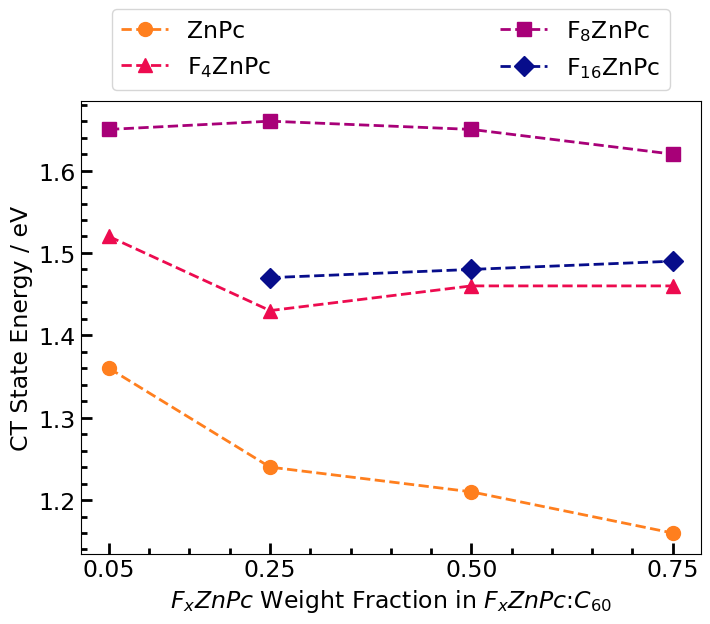

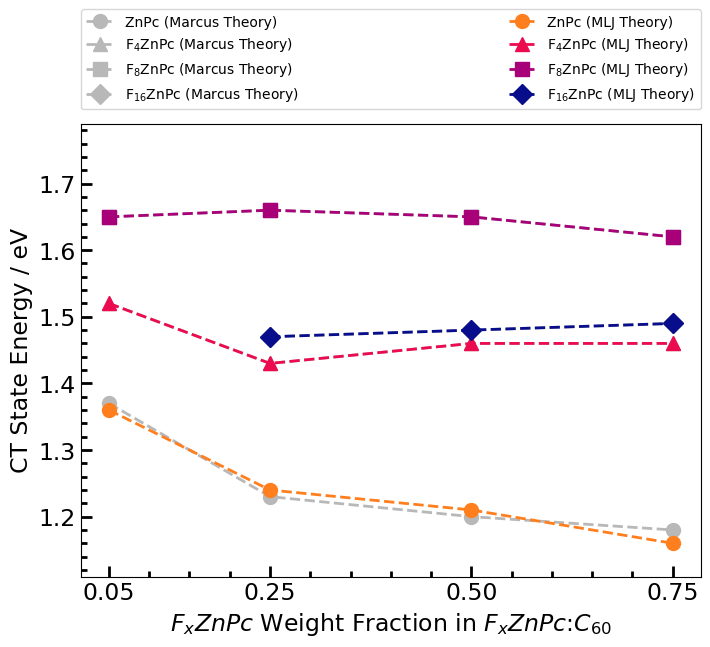

In [382]:
colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']
materials = ['ZnPc', '$\mathregular{F_{4}ZnPc}$', '$\mathregular{F_{8}ZnPc}$', '$\mathregular{F_{16}ZnPc}$']
labels = ['0.05', '0.25', '0.50', '0.75']

x = [0.05, 0.25, 0.50, 0.75]
F16_x = [0.25, 0.5, 0.75]

# Marcus Theory

plt.figure(figsize=(8,6), dpi = 100);
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$F_{x}ZnPc$ Weight Fraction in $F_{x}ZnPc$:$C_{60}$', fontsize=17, fontweight='medium')
plt.ylabel('CT State Energy / eV', fontsize=17, fontweight='medium')
plt.xticks(x, labels)

#plt.plot(x, ZnPc_Ect_Marcus, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0], color=colors[1])
#plt.plot(x, F4ZnPc_Ect_Marcus, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1], color=colors[2])
#plt.plot(x, F8ZnPc_Ect_Marcus[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2], color=colors[3])
#plt.plot(F16_x, F16ZnPc_Ect_Marcus[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3], color=colors[4])

plt.plot(x, ZnPc_Ect_MLJ, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0], color=colors[1])
plt.plot(x, F4ZnPc_Ect_MLJ, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1], color=colors[2])
plt.plot(x, F8ZnPc_Ect_MLJ[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2], color=colors[3])
plt.plot(F16_x, F16ZnPc_Ect_MLJ[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3], color=colors[4])

#plt.plot(x, ZnPc_Ect_Marcus, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0], color=colors[1])
#plt.plot(x, F4ZnPc_Ect_Marcus, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1], color=colors[2])
#plt.plot(x, F8ZnPc_Ect_Marcus[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2], color=colors[3])
#plt.plot(F16_x, F16ZnPc_Ect_Marcus[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3], color=colors[4])

#plt.ylim(1.11, 1.79)
plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.1, 0.9, .102), loc=2, ncol=2, mode="expand", borderaxespad=0.)

# Marcus Theory + Disorder

plt.figure(figsize=(8,6), dpi = 100);
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$F_{x}ZnPc$ Weight Fraction in $F_{x}ZnPc$:$C_{60}$', fontsize=17, fontweight='medium')
plt.ylabel('CT State Energy / eV', fontsize=17, fontweight='medium')
plt.xticks(x, labels)

# color='#B8B8B8'

plt.plot(x, ZnPc_Ect_Marcus, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0]+' (Marcus Theory)', color='#B8B8B8')
plt.plot(x, F4ZnPc_Ect_Marcus, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1]+' (Marcus Theory)', color='#B8B8B8')
plt.plot(x, F8ZnPc_Ect_Marcus[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2]+' (Marcus Theory)', color='#B8B8B8')
plt.plot(F16_x, F16ZnPc_Ect_Marcus[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3]+' (Marcus Theory)', color='#B8B8B8')

#plt.plot(x, ZnPc_Ect_Marcus_Disorder, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0]+' + Disorder (Marcus Theory)', color=colors[1]) #color='#B8B8B8')
#plt.plot(x, F4ZnPc_Ect_Marcus_Disorder, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1]+' + Disorder (Marcus Theory)', color=colors[2]) #color='#B8B8B8')
#plt.plot(x, F8ZnPc_Ect_Marcus_Disorder[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2]+' + Disorder (Marcus Theory)', color=colors[3]) #color='#B8B8B8')
#plt.plot(F16_x, F16ZnPc_Ect_Marcus_Disorder[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3]+' + Disorder (Marcus Theory)', color=colors[4]) #color='#B8B8B8')

plt.plot(x, ZnPc_Ect_MLJ, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0]+' (MLJ Theory)', color=colors[1]) #color='#B8B8B8')
plt.plot(x, F4ZnPc_Ect_MLJ, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1]+' (MLJ Theory)', color=colors[2]) #color='#B8B8B8')
plt.plot(x, F8ZnPc_Ect_MLJ[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2]+' (MLJ Theory)', color=colors[3]) #color='#B8B8B8')
plt.plot(F16_x, F16ZnPc_Ect_MLJ[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3]+' (MLJ Theory)', color=colors[4]) #color='#B8B8B8')

#plt.plot(x, ZnPc_Ect_MLJ_Disorder, 'o', markersize=10, linestyle='--', linewidth=2, label=materials[0]+' + Disorder (MLJ Theory)', color=colors[1])
#plt.plot(x, F4ZnPc_Ect_MLJ_Disorder, '^', markersize=10, linestyle='--', linewidth=2, label=materials[1]+' + Disorder (MLJ Theory)', color=colors[2])
#plt.plot(x, F8ZnPc_Ect_MLJ_Disorder[0:4], 's', markersize=10, linestyle='--', linewidth=2, label=materials[2]+' + Disorder (MLJ Theory)', color=colors[3])
#plt.plot(F16_x, F16ZnPc_Ect_MLJ_Disorder[1:], 'D', markersize=10, linestyle='--', linewidth=2, label=materials[3]+' + Disorder (MLJ Theory)', color=colors[4])

plt.ylim(1.11, 1.79)
#plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.26, 0.9, .102), loc=2, ncol=2, mode="expand", borderaxespad=0.)
plt.legend(fontsize = 10, bbox_to_anchor=(0., 1.15, 1, .102), loc=2, ncol=2, mode="expand", borderaxespad=0.)

#### Open Circuit Voltage

(0, 0.8)

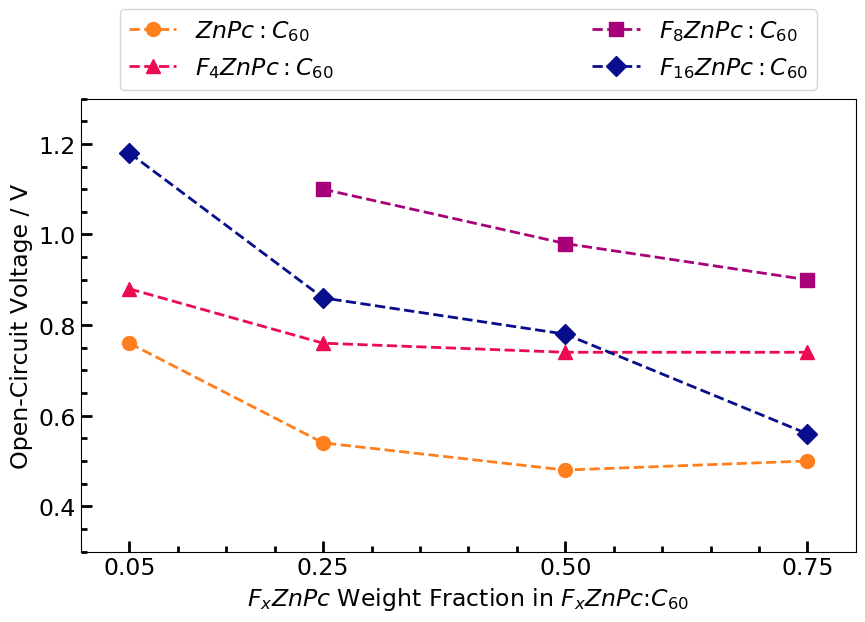

In [383]:
labels = ['0.05', '0.25', '0.50', '0.75']
colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

x = [0.05, 0.25, 0.5, 0.75]

#width = 0.03
#x_2m = [n - 2*width for n in x]
#x_m = [n - width for n in x]
#x_p = [n + width for n in x_2]

plt.figure(figsize=(10,6), dpi=100)
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$F_{x}ZnPc$ Weight Fraction in $F_{x}ZnPc$:$C_{60}$', fontsize=17, fontweight='medium')
plt.ylabel('Open-Circuit Voltage / V', fontsize=17, fontweight='medium')
plt.xticks(x, labels)

#plt.bar(x_2m[0:4], Voc[0:4], width=width, align='edge', label='$\mathregular{ZnPc:C_{60}}$', color=colors[1]) #, hatch='/')
#plt.bar(x_m[0:4], Voc[4:8], width=width, align='edge', label='$\mathregular{F_{4}ZnPc}:C_{60}$', color=colors[2]) #, hatch='|')
#plt.bar(x, Voc[8:13], width=width, align='edge', label='$\mathregular{F_{8}ZnPc}:C_{60}$', color=colors[3]) #, hatch='\\')
#plt.bar(x_p[0:4], Voc[13:17], width=width, align='edge', label='$\mathregular{F_{16}ZnPc}:C_{60}$', color=colors[4]) #, hatch='-')

plt.plot(x, ZnPc_Voc, 'o', markersize=10, linestyle='--', linewidth=2, label='$ZnPc:C_{60}$', color=colors[1])
plt.plot(x, F4ZnPc_Voc, '^', markersize=10, linestyle='--', linewidth=2, label='$F_{4}ZnPc:C_{60}$', color=colors[2])
plt.plot(x[1:], F8ZnPc_Voc[1:4],'s', markersize=10, linestyle='--', linewidth=2, label='$F_{8}ZnPc:C_{60}$', color=colors[3])
plt.plot(x, F16ZnPc_Voc, 'D', markersize=10, linestyle='--', linewidth=2, label='$F_{16}ZnPc:C_{60}$', color=colors[4])

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.02, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(0.3,1.3)
plt.xlim(0,0.8)

#### Voltage Losses

(0.5, 5)

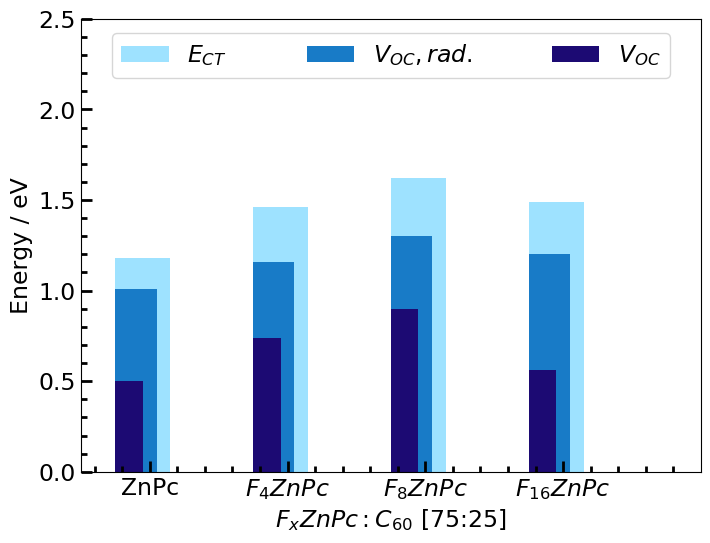

In [388]:
colors = ['#9ee2ff', '#59afe4', '#187bc7', '#0047a2', '#1c0a73']
labels = ['ZnPc', '$F_{4}ZnPc$', '$F_{8}ZnPc$', '$F_{16}ZnPc$']
labels_2 = ['0.05', '0.25', '0.50', '0.75']

x = [1,2,3,4]
x_2 = [0.75,1.75,2.75,3.75]

ZnPc_sample_list = {'F0_5':0, 'F0_25':1, 'F0_50':2, 'F0_75':3}
F4ZnPc_sample_list  = {'F4_5':4, 'F4_25':5, 'F4_50':6, 'F4_75':7}
F8ZnPc_sample_list = {'F8_5':8, 'F8_25':9, 'F8_50':10, 'F8_75':11, 'F8_95':12}
F16ZnPc_sample_list = {'F16_5':13, 'F16_25':14, 'F16_50':15, 'F16_75':16}

F0 = ZnPc_sample_list['F0_75']
F4 = F4ZnPc_sample_list['F4_75']
F8 = F8ZnPc_sample_list['F8_75']
F16 = F16ZnPc_sample_list['F16_75']

n = 3

Ect = [ZnPc_Ect_Marcus[n], F4ZnPc_Ect_Marcus[n], F8ZnPc_Ect_Marcus[n], F16ZnPc_Ect_Marcus[n]]
Voc = [ZnPc_Voc[n], F4ZnPc_Voc[n], F8ZnPc_Voc[n], F16ZnPc_Voc[n]]
voc_rad = [voc_rad_list[F0],voc_rad_list[F4],voc_rad_list[F8],voc_rad_list[F16]]
delta_voc_rad = [delta_voc_rad_list[F0],delta_voc_rad_list[F4],delta_voc_rad_list[F8],delta_voc_rad_list[F16]]
delta_voc_non_rad = [delta_voc_nonrad_list[F0],delta_voc_nonrad_list[F4],delta_voc_nonrad_list[F8],delta_voc_nonrad_list[F16]]

df = pd.DataFrame()
df['Sample'] = labels
df['Delta Voc, rad [V]'] = delta_voc_rad
df['Delta Voc, nonrad [V]'] = delta_voc_non_rad

plt.figure(figsize=(8,6), dpi=100)
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$F_{x}ZnPc:C_{60}}$ [75:25]', fontsize=17, fontweight='medium')
#plt.ylabel('Voltage / V', fontsize=30, fontweight='medium')
plt.ylabel('Energy / eV', fontsize=17, fontweight='medium')
plt.xticks(x, labels)

plt.bar(x_2, Ect, width=0.4, align='edge', label='$E_{CT}$', color=colors[0]) #, hatch='/')
plt.bar(x_2, voc_rad, width=0.3, align='edge', label='$V_{OC},rad.$', color=colors[2])#, hatch='|')
plt.bar(x_2, Voc, width=0.2, align='edge', label='$V_{OC}$', color=colors[4]) #, hatch='\\')

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 0.87, 0.9, .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plt.ylim(0,2.5)
plt.xlim(0.5, 5)

(0.5, 5)

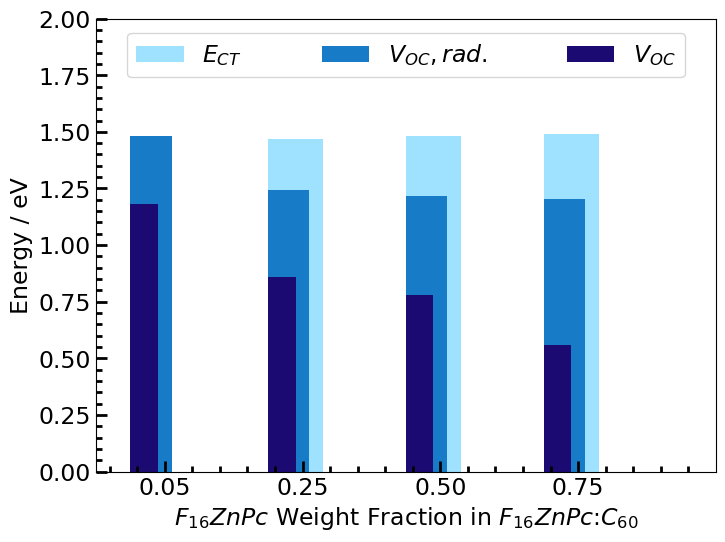

In [415]:
colors = ['#9ee2ff', '#59afe4', '#187bc7', '#0047a2', '#1c0a73']
labels = ['0.05', '0.25', '0.50', '0.75']

x = [1,2,3,4]
x_2 = [0.75,1.75,2.75,3.75]

ZnPc_sample_list = {'F0_5':0, 'F0_25':1, 'F0_50':2, 'F0_75':3}
F4ZnPc_sample_list  = {'F4_5':4, 'F4_25':5, 'F4_50':6, 'F4_75':7}
F8ZnPc_sample_list = {'F8_5':8, 'F8_25':9, 'F8_50':10, 'F8_75':11, 'F8_95':12}
F16ZnPc_sample_list = {'F16_5':13, 'F16_25':14, 'F16_50':15, 'F16_75':16}

F_5 = F16ZnPc_sample_list['F16_5']
F_25 = F16ZnPc_sample_list['F16_25']
F_50 = F16ZnPc_sample_list['F16_50']
F_75 = F16ZnPc_sample_list['F16_75']

Ect = F16ZnPc_Ect_Marcus
Voc = F16ZnPc_Voc
voc_rad = [voc_rad_list[F_5],voc_rad_list[F_25],voc_rad_list[F_50],voc_rad_list[F_75]]
delta_voc_rad = [delta_voc_rad_list[F_5],delta_voc_rad_list[F_25],delta_voc_rad_list[F_50],delta_voc_rad_list[F_75]]
delta_voc_non_rad = [delta_voc_nonrad_list[F_5],delta_voc_nonrad_list[F_25],delta_voc_nonrad_list[F_50],delta_voc_nonrad_list[F_75]]

df = pd.DataFrame()
df['Sample'] = labels
df['Delta Voc, rad [V]'] = delta_voc_rad
df['Delta Voc, nonrad [V]'] = delta_voc_non_rad

plt.figure(figsize=(8,6), dpi=100)
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$F_{16}ZnPc$ Weight Fraction in $F_{16}ZnPc$:$C_{60}$', fontsize=17, fontweight='medium')
#plt.ylabel('Voltage / V', fontsize=30, fontweight='medium')
plt.ylabel('Energy / eV', fontsize=17, fontweight='medium')
plt.xticks(x, labels)

plt.bar(x_2, Ect[0:4], width=0.4, align='edge', label='$E_{CT}$', color=colors[0]) #, hatch='/')
plt.bar(x_2, voc_rad[0:4], width=0.3, align='edge', label='$V_{OC},rad.$', color=colors[2])#, hatch='|')
plt.bar(x_2, Voc[0:4], width=0.2, align='edge', label='$V_{OC}$', color=colors[4]) #, hatch='\\')

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 0.87, 0.9, .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plt.ylim(0,2)
plt.xlim(0.5, 5)

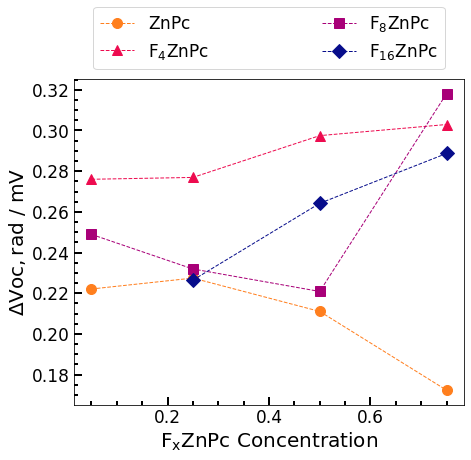

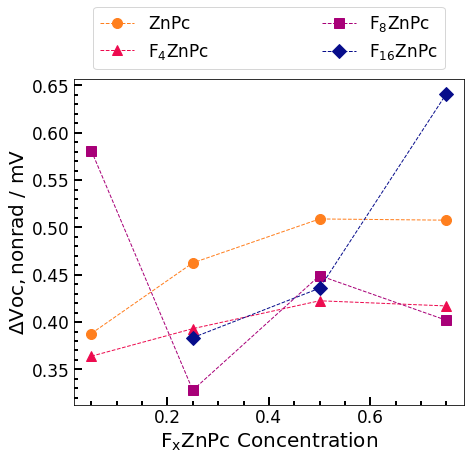

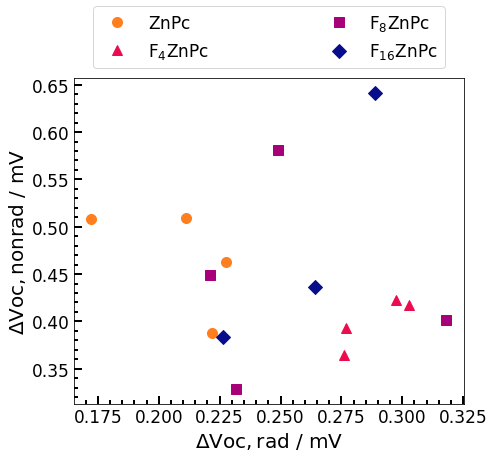

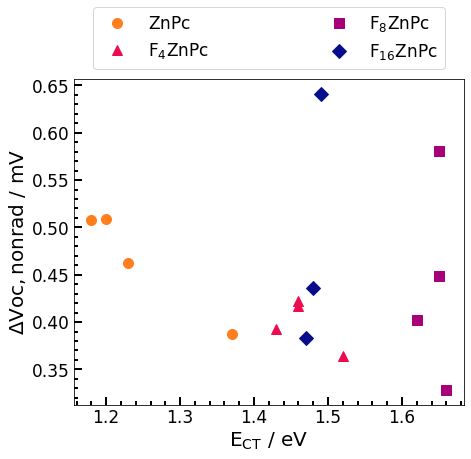

In [389]:
x = [0.05, 0.25, 0.50, 0.75]
F16_x = [0.25, 0.5, 0.75]

colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

F0_D_vocrad = [delta_voc_rad_list[ZnPc_sample_list['F0_5']],delta_voc_rad_list[ZnPc_sample_list['F0_25']],delta_voc_rad_list[ZnPc_sample_list['F0_50']],delta_voc_rad_list[ZnPc_sample_list['F0_75']]]
F0_D_vocnonrad = [delta_voc_nonrad_list[ZnPc_sample_list['F0_5']],delta_voc_nonrad_list[ZnPc_sample_list['F0_25']],delta_voc_nonrad_list[ZnPc_sample_list['F0_50']],delta_voc_nonrad_list[ZnPc_sample_list['F0_75']]]
F0_Ect = ZnPc_Ect_Marcus

F4_D_vocrad = [delta_voc_rad_list[F4ZnPc_sample_list['F4_5']],delta_voc_rad_list[F4ZnPc_sample_list['F4_25']],delta_voc_rad_list[F4ZnPc_sample_list['F4_50']],delta_voc_rad_list[F4ZnPc_sample_list['F4_75']]]
F4_D_vocnonrad = [delta_voc_nonrad_list[F4ZnPc_sample_list['F4_5']],delta_voc_nonrad_list[F4ZnPc_sample_list['F4_25']],delta_voc_nonrad_list[F4ZnPc_sample_list['F4_50']],delta_voc_nonrad_list[F4ZnPc_sample_list['F4_75']]]
F4_Ect = F4ZnPc_Ect_Marcus

F8_D_vocrad = [delta_voc_rad_list[F8ZnPc_sample_list['F8_5']],delta_voc_rad_list[F8ZnPc_sample_list['F8_25']],delta_voc_rad_list[F8ZnPc_sample_list['F8_50']],delta_voc_rad_list[F8ZnPc_sample_list['F8_75']]]
F8_D_vocnonrad = [delta_voc_nonrad_list[F8ZnPc_sample_list['F8_5']],delta_voc_nonrad_list[F8ZnPc_sample_list['F8_25']],delta_voc_nonrad_list[F8ZnPc_sample_list['F8_50']],delta_voc_nonrad_list[F8ZnPc_sample_list['F8_75']]]
F8_Ect = F8ZnPc_Ect_Marcus

F16_D_vocrad = [delta_voc_rad_list[F16ZnPc_sample_list['F16_5']],delta_voc_rad_list[F16ZnPc_sample_list['F16_25']],delta_voc_rad_list[F16ZnPc_sample_list['F16_50']],delta_voc_rad_list[F16ZnPc_sample_list['F16_75']]]
F16_D_vocnonrad = [delta_voc_nonrad_list[F16ZnPc_sample_list['F16_5']],delta_voc_nonrad_list[F16ZnPc_sample_list['F16_25']],delta_voc_nonrad_list[F16ZnPc_sample_list['F16_50']],delta_voc_nonrad_list[F16ZnPc_sample_list['F16_75']]]
F16_Ect = F16ZnPc_Ect_Marcus

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{F_{x}ZnPc}$ Concentration', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,rad}$ / mV', fontsize=20, fontweight='medium')
#plt.xticks(x, labels)

plt.plot(x, F0_D_vocrad, 'o', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(x, F4_D_vocrad, '^', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(x, F8_D_vocrad,'s', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(F16_x, F16_D_vocrad[1:], 'D', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.03, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.show()

########################

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{F_{x}ZnPc}$ Concentration', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,nonrad}$ / mV', fontsize=20, fontweight='medium')

plt.plot(x, F0_D_vocnonrad, 'o', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(x, F4_D_vocnonrad, '^', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(x, F8_D_vocnonrad,'s', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(F16_x, F16_D_vocnonrad[1:], 'D', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.03, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

########################

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{\Delta Voc,rad}$ / mV', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,nonrad}$ / mV', fontsize=20, fontweight='medium')
#plt.xticks(x, labels)

plt.plot(F0_D_vocrad, F0_D_vocnonrad, 'o', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(F4_D_vocrad, F4_D_vocnonrad, '^', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(F8_D_vocrad, F8_D_vocnonrad,'s', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(F16_D_vocrad[1:], F16_D_vocnonrad[1:], 'D', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.03, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

########################

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{E_{CT}}$ / eV', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,nonrad}$ / mV', fontsize=20, fontweight='medium')

plt.plot(F0_Ect, F0_D_vocnonrad, 'o', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(F4_Ect, F4_D_vocnonrad, '^', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(F8_Ect[:4], F8_D_vocnonrad,'s', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(F16_Ect[1:], F16_D_vocnonrad[1:], 'D', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 17, bbox_to_anchor=(0.05, 1.03, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

#### Energy Gap Law

In [213]:
def line(x, m, b):
    y = m*x + b
    return y

0.6412909831224876


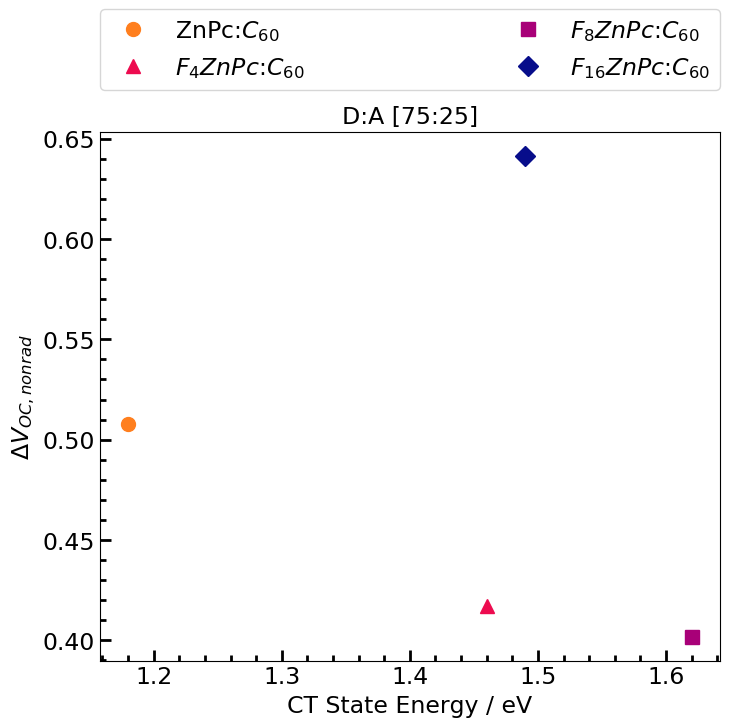

In [395]:
colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

ZnPc_sample_list = {'F0_5':0, 'F0_25':1, 'F0_50':2, 'F0_75':3}
F4ZnPc_sample_list  = {'F4_5':4, 'F4_25':5, 'F4_50':6, 'F4_75':7}
F8ZnPc_sample_list = {'F8_5':8, 'F8_25':9, 'F8_50':10, 'F8_75':11, 'F8_95':12}
F16ZnPc_sample_list = {'F16_5':13, 'F16_25':14, 'F16_50':15, 'F16_75':16}

F0 = ZnPc_sample_list['F0_75']
F4 = F4ZnPc_sample_list['F4_75']
F8 = F8ZnPc_sample_list['F8_75']
F16 = F16ZnPc_sample_list['F16_75']

n = 3

Ect = [ZnPc_Ect_Marcus[n], F4ZnPc_Ect_Marcus[n], F8ZnPc_Ect_Marcus[n], F16ZnPc_Ect_Marcus[n]]
Voc = [ZnPc_Voc[n], F4ZnPc_Voc[n], F8ZnPc_Voc[n], F16ZnPc_Voc[n]]
voc_rad = [voc_rad_list[F0],voc_rad_list[F4],voc_rad_list[F8],voc_rad_list[F16]]
delta_voc_rad = [delta_voc_rad_list[F0],delta_voc_rad_list[F4],delta_voc_rad_list[F8],delta_voc_rad_list[F16]]
delta_voc_non_rad = [delta_voc_nonrad_list[F0],delta_voc_nonrad_list[F4],delta_voc_nonrad_list[F8],delta_voc_nonrad_list[F16]]

#best_vals, covar = curve_fit(line, Ect, delta_voc_non_rad)
#x = np.arange(1.1, 1.8, 0.1)
#y = [line(x_, best_vals[0], best_vals[1]) for x_ in x]

plt.figure(figsize=(8,7), dpi=100)
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('CT State Energy / eV', fontsize=17, fontweight='medium')
plt.ylabel('$\Delta V_{OC, nonrad}$', fontsize=17, fontweight='medium')
plt.title('D:A [75:25]', fontsize=17)

#plt.plot(x, y,  linestyle='--', linewidth=1, color='grey')

plt.plot(Ect[0], delta_voc_non_rad[0], 'o', markersize=10, linestyle='--', linewidth=0, color = colors[1], label='ZnPc:$C_{60}$')
plt.plot(Ect[1], delta_voc_non_rad[1], '^', markersize=10, linestyle='--', linewidth=0, color = colors[2], label='$F_{4}ZnPc$:$C_{60}$')
plt.plot(Ect[2], delta_voc_non_rad[2], 's', markersize=10, linestyle='--', linewidth=0, color = colors[3], label='$F_{8}ZnPc$:$C_{60}$')
plt.plot(Ect[3], delta_voc_non_rad[3], 'D', markersize=10, linestyle='--', linewidth=0, color = colors[4], label='$F_{16}ZnPc$:$C_{60}$')

#plt.ylim(0.29, 0.51)
#plt.xlim(1.05, 1.75)

plt.legend(fontsize = 17, bbox_to_anchor=(0, 1.08, 1, 2), loc=3,ncol=2, mode="expand", borderaxespad=0.)

print(delta_voc_non_rad[3])

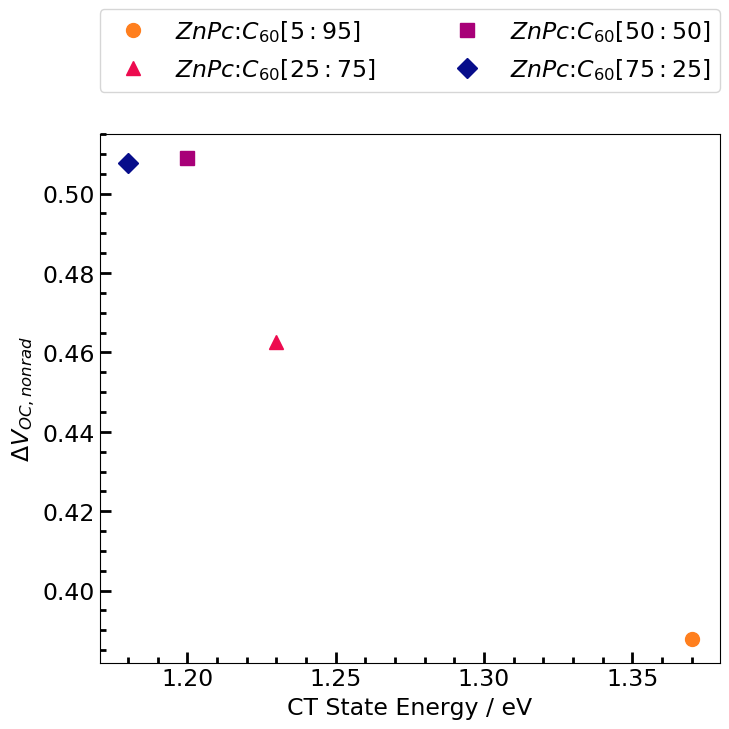

In [402]:
colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

ZnPc_sample_list = {'F0_5':0, 'F0_25':1, 'F0_50':2, 'F0_75':3}
F4ZnPc_sample_list  = {'F4_5':4, 'F4_25':5, 'F4_50':6, 'F4_75':7}
F8ZnPc_sample_list = {'F8_5':8, 'F8_25':9, 'F8_50':10, 'F8_75':11, 'F8_95':12}
F16ZnPc_sample_list = {'F16_5':13, 'F16_25':14, 'F16_50':15, 'F16_75':16}

F_5 = ZnPc_sample_list['F0_5']
F_25 = ZnPc_sample_list['F0_25']
F_50 = ZnPc_sample_list['F0_50']
F_75 = ZnPc_sample_list['F0_75']

Ect = ZnPc_Ect_Marcus
voc_rad = [voc_rad_list[F_5],voc_rad_list[F_25],voc_rad_list[F_50],voc_rad_list[F_75]]
delta_voc_rad = [delta_voc_rad_list[F_5],delta_voc_rad_list[F_25],delta_voc_rad_list[F_50],delta_voc_rad_list[F_75]]
delta_voc_non_rad = [delta_voc_nonrad_list[F_5],delta_voc_nonrad_list[F_25],delta_voc_nonrad_list[F_50],delta_voc_nonrad_list[F_75]]

#best_vals, covar = curve_fit(line, Ect, delta_voc_non_rad)
#x = np.arange(1.1, 1.8, 0.1)
#y = [line(x_, best_vals[0], best_vals[1]) for x_ in x]

plt.figure(figsize=(8,7), dpi=100)
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('CT State Energy / eV', fontsize=17, fontweight='medium')
plt.ylabel('$\Delta V_{OC, nonrad}$', fontsize=17, fontweight='medium')

#plt.plot(x, y,  linestyle='--', linewidth=1, color='grey')

plt.plot(Ect[0], delta_voc_non_rad[0], 'o', markersize=10, linestyle='--', linewidth=0, color = colors[1], label='$ZnPc$:$C_{60} [5:95]$')
plt.plot(Ect[1], delta_voc_non_rad[1], '^', markersize=10, linestyle='--', linewidth=0, color = colors[2], label='$ZnPc$:$C_{60} [25:75]$')
plt.plot(Ect[2], delta_voc_non_rad[2], 's', markersize=10, linestyle='--', linewidth=0, color = colors[3], label='$ZnPc$:$C_{60} [50:50]$')
plt.plot(Ect[3], delta_voc_non_rad[3], 'D', markersize=10, linestyle='--', linewidth=0, color = colors[4], label='$ZnPc$:$C_{60} [75:25]$')

#plt.ylim(0.29, 0.51)
#plt.xlim(1.05, 1.75)

plt.legend(fontsize = 17, bbox_to_anchor=(0, 1.08, 1, 2), loc=3,ncol=2, mode="expand", borderaxespad=0.)

#### Energy Levels

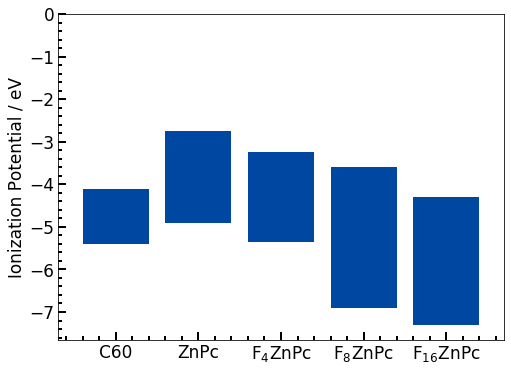

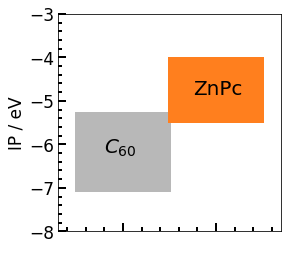

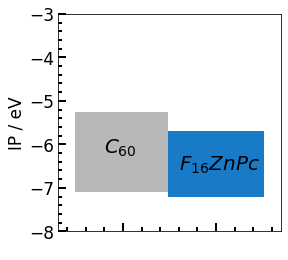

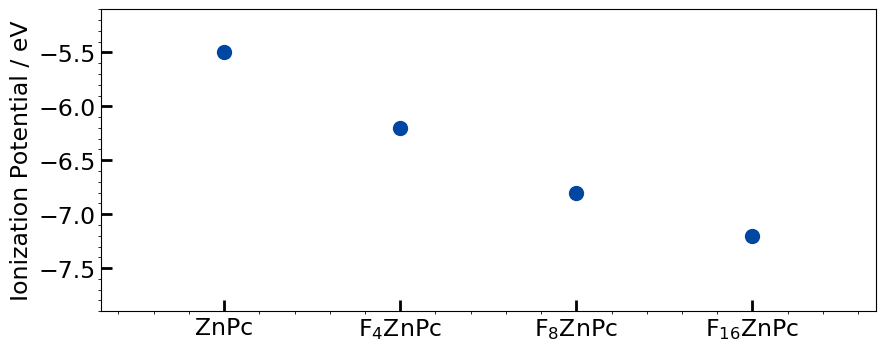

In [145]:
### Check if this is correct ###


labels = ['C60', 'ZnPc', '$\mathregular{F_{4}ZnPc}$', '$\mathregular{F_{8}ZnPc}$', '$\mathregular{F_{16}ZnPc}$']
x = [1,2,3,4,5]
x_2 = [0.75,1.75,2.75,3.75]
colors = ['#9ee2ff', '#59afe4', '#187bc7', '#0047a2', '#1c0a73']

width = 0.3

HOMO = [-5.4, -4.9, -5.36, -6.9, -7.3] # These are rough estimates from the Schwarze papers
LUMO = [-4.1, -2.75, -3.23, -3.6, -4.3]

x_IE = [1, 2]
IE_C60 = [-7.1]
IE = [-5.5, -6.2, -6.8, -7.2]

# Bar Diagram

plt.figure(figsize=(8,6))
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.ylabel('Ionization Potential / eV', fontsize=17, fontweight='medium')
plt.xticks(x, labels)
#plt.ylim(-7.9, -5.1)
plt.xlim(0.3, 5.7)

plt.bar(x, HOMO, color='#0047a2')
plt.bar(x, LUMO, color='white')

# Material Schematics

labels_IE_1 = ['$C_{60}$', 'ZnPc']
labels_IE_2 = ['$C_{60}$', '$F_{16}ZnPc$']
labels_IE_3 = [' ', ' ']

plt.figure(figsize=(4,4))
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.ylabel('IP / eV', fontsize=17, fontweight='medium')
plt.xticks(x_IE, labels_IE_3)
plt.ylim(-8, -3)
plt.xlim(0.3, 2.7)

plt.bar(x_IE[0], IE_C60[0], color='#B8B8B8', width=1.025)
plt.bar(x_IE[0], IE_C60[0]+1.85, color='white', width=1.025)
plt.bar(x_IE[1], IE[0], color='#ff7f1e', label='ZnPc', width=1.025)
plt.bar(x_IE[1], IE[0]+1.5, color='white', width=1.025)

plt.text(x=0.8 , y =-6.2 , s='$C_{60}$' , fontsize=20)
plt.text(x=1.75 , y =-4.85 , s='ZnPc' , fontsize=20)

plt.figure(figsize=(4,4))
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.ylabel('IP / eV', fontsize=17, fontweight='medium')
plt.xticks(x_IE, labels_IE_3)
plt.ylim(-8, -3)
plt.xlim(0.3, 2.7)

plt.bar(x_IE[0], IE_C60[0], color='#B8B8B8', width=1.025)
plt.bar(x_IE[0], IE_C60[0]+1.85, color='white', width=1.025)
plt.bar(x_IE[1], IE[3], color='#187bc7', label='$F_{16}ZnPc$', width=1.025)
plt.bar(x_IE[1], IE[3]+1.5, color='white', width=1.025)

plt.text(x=0.8 , y =-6.2 , s='$C_{60}$' , fontsize=20)
plt.text(x=1.6 , y =-6.6 , s='$F_{16}ZnPc$' , fontsize=20)

# Scatter Plot

plt.figure(figsize=(10,4), dpi=100)
plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=17, direction='in', axis='both', which='major', length=8, width=2)
#plt.tick_params(labelsize=17, direction='in', axis='both', which='minor', length=4, width=2)
plt.ylabel('Ionization Potential / eV', fontsize=17, fontweight='medium')
plt.xticks(x[:-1], labels[1:])
plt.ylim(-7.9, -5.1)
plt.xlim(0.3, 4.7)

plt.plot(x[:-1], IE, 'o', color='#0047a2', markersize=10, linewidth=0)